##### BY: Sudip PANDIT*

### Oerview of the project
+ This project has described the principal component analysis. Due to the enoromus features (curse of dimensionality) present in the dataset, it is always important to select/extract the best features which is productive to help in generating output.
+ So, PCA is one of the good feature selection technique. PCA reduces the higher dimensional to lower dimension without loosing the gravity of the features and combines all correlated variables together.
+ It combines the features and reduces the dimension of the features. It doesn't mean that it ignores the features. 
+ Mostly, the higher dimensional features has chances of overfitting so, PCA is a a way to eliminate the overfitting issue.


### Problem statement:
In machine learning, it is said that almost 70% time is consumed in data preprocessing and feature engineering. Having extensive number of features creates more time consumption. This projct will cor the following questions:
+ What are the terms and termonologies comes into PCA?
+ What is the best process to get PCA?
+ How will we plot PCA in 2D?

### Terms and Terminologies

#### Dimensionality:
It is the number of features in the dataset.

#### Correlation: 
It is the relationship between two variables/features. It gives the strong, weak and no relation between the variables.

#### Principal Components:
+ After the reduction of the features, only certain correlated features from the overall features are obtained, called principal components.

#### Covariance Matrix:
+ It is the relationship between the movement of two predictors.

#### Eigen Vectors and Eigen Values
The characteristic vector of a square matrix does not changes its direction under the associated linear transformation, called eigen vectors.

If V is a vector that is not zero, than it is an eigenvector of a square matrix A if Av is a scalar multiple of v. This condition should be written as the equation: AV= λv.
    where, λ is a scalar known as the eigenvalue or characteristic value associated with eigenvector v.



### Objectives: 
The purpose of this project is to examine Principal Component Analysis(PCA) in Machine Learning. It will descibe through algorithm available in python sklearn to find the minimum features from higher dimension to lower dimension to observe the impact of less features in model building.

### Problem analysis
+ I will apply a simple method (a complete and simplified explanation) to achieve the objectives in this project
+ I will be importing python sklearn for the data analysis.
+ The following steps is normally followed in Principal Component Analysis:
    + Standardization
    + Covariance matrix computation
    + Compute the eigenvectors and eigenvalues of the covariance matrix
    + Feature vectors
    + Recast the data along the Principal Component axes

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.datasets import load_breast_cancer

In [35]:
cancer = load_breast_cancer()

In [36]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [37]:
len(cancer['feature_names'])

30

In [39]:
y=cancer.target

In [42]:
x=cancer.feature_names

In [43]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [44]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Import the sklearn library and scaling the variables

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### Perform PCA analysis

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(x_scaled)

PCA(n_components=2, random_state=42)

In [47]:
x_pca = pca.transform(x_scaled)
x_scaled.shape, x_pca.shape

((569, 30), (569, 2))

#### Visualize the first and second PCAs

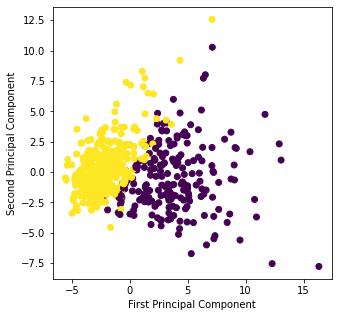

In [48]:
plt.figure(figsize=(5,5))
plt.scatter(x_pca[0:, 0], x_pca[:, 1], c=cancer.target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [49]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [50]:
pca = PCA(n_components=8, random_state=42)
x_pca = pca.fit_transform(x_scaled)
variance = pca.explained_variance_ratio_
variance

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724])

<BarContainer object of 8 artists>

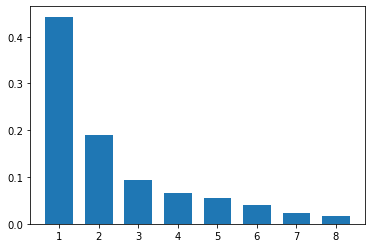

In [51]:
plt.bar(x = range(1, len(variance)+1), height=variance, width=0.7)

#### Visualize PCA only 2 components/2D

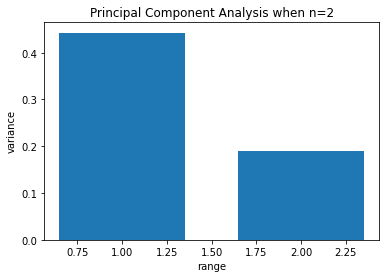

In [52]:
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_scaled)
variance = pca.explained_variance_ratio_
plt.bar(x = range(1, len(variance)+1), height=variance, width=0.7)
plt.xlabel('range')
plt.ylabel('variance')
plt.title('Principal Component Analysis when n=2')
plt.show()


### References:
+ https://www.slideshare.net/VinodSrivastava5/eigenvalues-and-eigenvectors-70452197
+ https://builtin.com/data-science/step-step-explanation-principal-component-analysis
+ https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial
+ https://www.youtube.com/watch?v=iwqqX-mT9Y0